In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

os.getcwd()

agency = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/agency.txt')
agency = pd.DataFrame(agency)
agency.head()

,agency_phone,agency_url,agency_id,agency_name,agency_timezone,agency_lang
0,401-781-9400,http://www.ripta.com,RIPTA,Rhode Island Public Transit Authority,America/New_York,en


In [2]:
calendar_dates = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/calendar_dates.txt')
calendar_dates = pd.DataFrame(calendar_dates)
calendar_dates.describe()

,date,exception_type
count,404.000000,404.000000
mean,20160437.559406,1.980198
std,188.813952,0.139492
min,20160118.000000,1.000000
25%,20160307.000000,2.000000
50%,20160419.000000,2.000000
75%,20160531.000000,2.000000
max,20160824.000000,2.000000


In [3]:
calendar = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/calendar.txt')
calendar = pd.DataFrame(calendar)
# calendar.describe()
calendar.head()

,service_id,start_date,end_date,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,JA2016-hjat1501-Weekday-01-0001000,20160121,20160616,0,0,0,1,0,0,0
1,JU2016-hjut1601-Weekday-01-0001000,20160623,20160826,0,0,0,1,0,0,0
2,JU2016-hjun1607-Sunday-01,20160619,20160821,0,0,0,0,0,0,1
3,JU2016-hun1601-Weekday-01,20160620,20160826,1,1,1,1,1,0,0
4,JU2016-hjum1607-Sunday-01,20160619,20160821,0,0,0,0,0,0,1


In [4]:
routes = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/routes.txt')
routes = pd.DataFrame(routes)
# calendar.describe()
routes.head()

,route_long_name,route_type,agency_id,route_id,route_url,route_desc,route_short_name
0,Elmwood/Airport,3,RIPTA,20-58,http://www.ripta.com/20,NaN,20
1,Elmwood/Airport,3,RIPTA,20-57,http://www.ripta.com/20,NaN,20
2,Pontiac Avenue,3,RIPTA,22-57,http://www.ripta.com/22,NaN,22
3,Newport/URI-Kingston,3,RIPTA,64-58,http://www.ripta.com/64,NaN,64
4,Newport/URI-Kingston,3,RIPTA,64-57,http://www.ripta.com/64,NaN,64


In [5]:
shapes = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/shapes.txt')
shapes = pd.DataFrame(shapes)
shapes.describe()
# shapes.head()

,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
count,166106.000000,166106.000000,166106.000000,0
mean,41.732854,-71.432401,355.956124,NaN
std,0.145094,0.072571,292.828916,NaN
min,41.372620,-71.831730,1.000000,NaN
25%,41.642990,-71.474720,118.000000,NaN
50%,41.781940,-71.432670,273.000000,NaN
75%,41.826620,-71.404690,534.000000,NaN
max,42.017020,-71.186643,1406.000000,NaN


In [6]:
stop_times = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/stop_times.txt')
stop_times = pd.DataFrame(stop_times)
# stop_times.describe()
# stop_times['pickup_type'].value_counts()
len(stop_times) #486027

stop_times.head(15)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,2282362-JU2016-hun1601-Weekday-01,07:38:00,07:38:00,020640,1,NaN,NaN,NaN,NaN
1,2282362-JU2016-hun1601-Weekday-01,07:38:00,07:38:00,020505,2,NaN,NaN,NaN,NaN
2,2282362-JU2016-hun1601-Weekday-01,07:39:00,07:39:00,056615,3,NaN,NaN,NaN,NaN
3,2282362-JU2016-hun1601-Weekday-01,07:40:00,07:40:00,020780,4,NaN,NaN,NaN,NaN
4,2282362-JU2016-hun1601-Weekday-01,07:40:00,07:40:00,020725,5,NaN,NaN,NaN,NaN
5,2282362-JU2016-hun1601-Weekday-01,07:41:00,07:41:00,020600,6,NaN,NaN,NaN,NaN
6,2282362-JU2016-hun1601-Weekday-01,07:41:00,07:41:00,060165,7,NaN,NaN,NaN,NaN
7,2282362-JU2016-hun1601-Weekday-01,07:42:00,07:42:00,020665,8,NaN,NaN,NaN,NaN
8,2282362-JU2016-hun1601-Weekday-01,07:43:00,07:43:00,020320,9,NaN,NaN,NaN,NaN
9,2282362-JU2016-hun1601-Weekday-01,07:44:00,07:44:00,020120,10,NaN,NaN,NaN,NaN


In [7]:
stops = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/stops.txt')
stops = pd.DataFrame(stops)
# stops.describe()
# len(stops) 

stops.head(15)

,stop_lat,stop_code,stop_lon,stop_id,stop_url,parent_station,stop_desc,stop_name,location_type,zone_id
0,41.496595,NaN,-71.367009,001526_merged_950019,NaN,NaN,NaN,E SHORE FS NARRAGANSETT,0,NaN
1,41.707944,NaN,-71.522589,005865_merged_950124,NaN,NaN,NaN,MAIN AT 1125 MAIN ST (CVS PHARMACY),0,NaN
2,41.703761,NaN,-71.421540,005595,NaN,NaN,NaN,WEST SHORE FS MOCASSIN,0,NaN
3,41.630229,NaN,-71.246093,056830,NaN,NaN,NaN,BOYDS LANE NS OLD BOYDS,0,NaN
4,41.521907,NaN,-71.299019,002295,NaN,NaN,NaN,W MAIN AT MIDDLETOWN PUBLIC LIBRARY,0,NaN
5,41.816356,NaN,-71.433215,014615,NaN,NaN,NaN,WESTMINSTER FS PARADE,0,NaN
6,41.517800,NaN,-71.297398,056835,NaN,NaN,NaN,E MAIN AT 94 E MAIN,0,NaN
7,41.816474,NaN,-71.444330,014610,NaN,NaN,NaN,PLAINFIELD OPP DIKE,0,NaN
8,41.829562,NaN,-71.449162,027245,NaN,NaN,NaN,MT PLEASANT NS DOVER,0,NaN
9,41.426203,NaN,-71.467536,000095,NaN,NaN,NaN,S PIER OPP 172 S PIER,0,NaN


In [8]:
trips = pd.read_csv('/Users/HudsonCavanagh/GA_dsi-projects/capstone/ripta_google_transit/trips.txt')
trips = pd.DataFrame(trips)
# stops.describe()
# len(stops) 

trips.head(15)
# len(trips)

,block_id,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id
0,b_313090,55-58,0,PROVIDENCE,550029,JU2016-hun1601-Weekday-01,2282362-JU2016-hun1601-Weekday-01
1,b_313066,78-58,0,PROVIDENCE,780021,JU2016-hun1601-Weekday-01,2281853-JU2016-hun1601-Weekday-01
2,b_316443,11-58,1,BROAD STREET,110020,JU2016-hjun1606-Saturday-01,2309100-JU2016-hjun1606-Saturday-01
3,b_316445,11-58,1,BROAD STREET,110020,JU2016-hjun1606-Saturday-01,2309080-JU2016-hjun1606-Saturday-01
4,b_316424,54-58,1,WOONSOCKET,540072,JU2016-hjun1606-Saturday-01,2308898-JU2016-hjun1606-Saturday-01
5,b_313263,11-58,1,BROAD STREET,110020,JU2016-hjun1607-Sunday-01,2285511-JU2016-hjun1607-Sunday-01
6,b_312972,3-58,0,PROVIDENCE,30052,JU2016-hun1601-Weekday-01,2280287-JU2016-hun1601-Weekday-01
7,b_313010,40-58,1,BUTLER HOSPITAL,400012,JU2016-hun1601-Weekday-01,2280451-JU2016-hun1601-Weekday-01
8,b_312966,92-58,0,EASTSIDE MARKETPLACE via FOX POINT,920050,JU2016-hun1601-Weekday-01,2280216-JU2016-hun1601-Weekday-01
9,a_305981,20-57,0,PROVIDENCE,200045,JA2016-han1501-Weekday-09,2234472-JA2016-han1501-Weekday-09


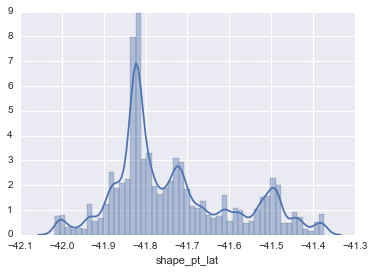

In [9]:
import seaborn as sns
%matplotlib inline

sns.distplot((-shapes['shape_pt_lat']))

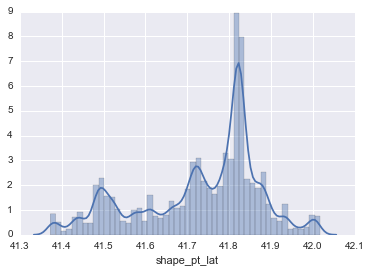

In [10]:
sns.distplot(shapes['shape_pt_lat'])

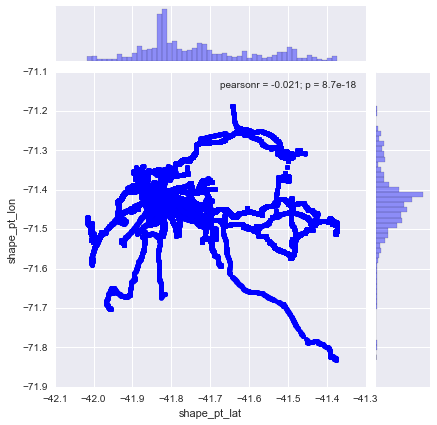

In [11]:
sns.jointplot((-shapes['shape_pt_lat']), shapes['shape_pt_lon'], color='blue')

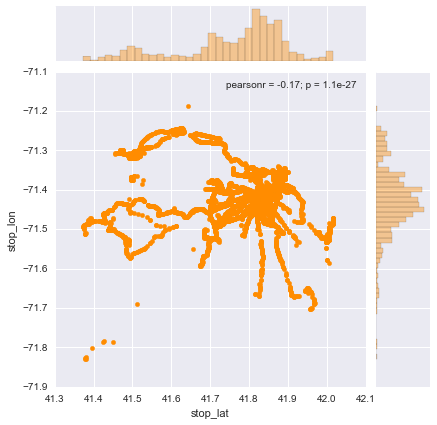

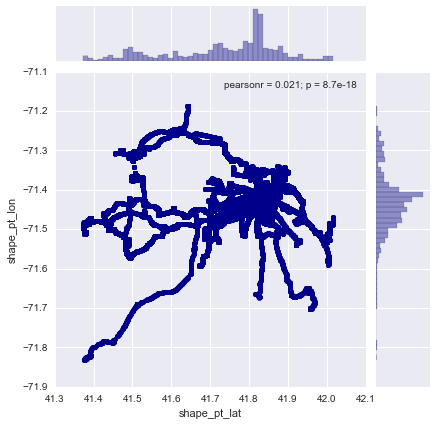

In [12]:
sns.jointplot((stops['stop_lat']), stops['stop_lon'], size = 6, color='darkorange')
sns.jointplot(shapes['shape_pt_lat'], shapes['shape_pt_lon'], size = 6, color='darkblue')

In [14]:
os.getcwd()
# pd.read_csv('/Users/HudsonCavanagh/')

'/Users/HudsonCavanagh/GA_dsi-projects/capstone'